# 神经网络多分类器

## 生成一些数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
N = 100 # 每一个类别的生成的点的数量
D = 2 # 每个点的维度，这里使用平面，所以是2维数据
K = 3 # 类别数量，我们一共生成3个类别的点

In [9]:
# 所有的样本数据，一共300个点，每个点用2个维度表示
# 所有训练数据就是一个300*2的二维矩阵
X = np.zeros((N*K, D))
# 标签数据，一共是300个点，每个点对应一个类别，
# 所以标签是一个300*1的矩阵
y = np.zeros(N*K, dtype='uint8')

# 生成训练数据
for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

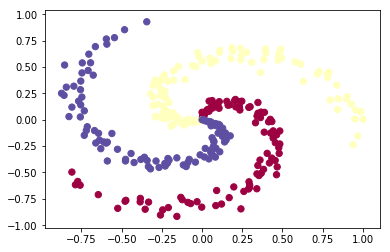

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

## 训练一个Softmax线性分类器

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# 初始化权重和偏置
W = 0.01 * np.random.randn(D, K)
b = np.zeros(1)

In [26]:
alpha = 1e-0
reg = 1e-3 # regularization strength

In [27]:
X.shape,y.shape

((300, 2), (300,))

In [28]:
preds = X.dot(W) + b

In [129]:
class Module(object):
    def __init__(self):
        pass
    
    def __call__(self, x):
        return self.forward(x)
    
    def forward(self, x):
        return x
    
    def backward(self, dx):
        return dx
    
    def setup(self):
        pass

In [297]:
class Linear(Module):
    def __init__(self, in_feartures, out_features, has_bais = True):
        self.W = 0.01 * np.random.randn(in_feartures, out_features)
        if has_bais is True:
            self.b = np.random.randn(out_features, 1)
            
    def forward(self, x):
        self.x = x
        x = x.dot(self.W) + self.b.T
        return x
    
    def backward(self, dy = None):
        if dy is not None:
            self.dW = X.T.dot(dy)
            self.db = np.ones((1, self.x.shape[0])).dot(dy).T
            print(self.dW.shape, self.db.shape)
            return dy.dot(self.W.T)
        else:
            self.dW = X.T
            self.db = np.ones(self.b.shape)
            print(self.dW.shape, self.db.shape)
            return self.W.T

In [298]:
class Softmax(Module):
    def forward(self, x):
        assert(len(x.shape) == 2)
        assert(x.shape[0] > 0 and x.shape[1] > 0)
        
        self.exp_scores = exp_scores = np.exp(x)
        self.exp_scores_sum = exp_scores_sum = exp_scores.sum(axis=1, keepdims=True)
        
        x = exp_scores / exp_scores_sum
        
        return x
    
    def backward(self, dy=1):
        exp_scores = self.exp_scores
        exp_scores_sum = self.exp_scores_sum
        
        dx = (exp_scores_sum - exp_scores) / (exp_scores_sum ** 2)
        
        return dx * dy
        

In [299]:
linear = Linear(D, K)

In [300]:
h = linear(X)

In [301]:
softmax = Softmax()

In [302]:
probs = softmax(h)

In [306]:
linear.backward().shape

(2, 300) (3, 1)


(3, 2)

In [303]:
linear.backward(softmax.backward()).shape

(2, 3) (3, 1)


(300, 2)